In [1]:
import pandas as pd

from pycaret.regression import *

In [2]:
df = pd.read_csv('Flights Challenge.csv')

In [3]:
df

,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,CRSArrTime,ArrDelay
0,4,19,5,DL,11433,13303,837,-3,1138,1
1,4,19,5,DL,14869,12478,1705,0,2336,-8
2,4,19,5,DL,14057,14869,600,-4,851,-15
3,4,19,5,DL,15016,11433,1630,28,1903,24
4,4,19,5,DL,11193,12892,1615,-6,1805,-11
...,...,...,...,...,...,...,...,...,...,...
2719392,10,19,6,DL,13204,14869,730,1,1013,-3
2719393,10,19,6,DL,10397,13495,944,-2,1018,-3
2719394,10,19,6,DL,10140,10397,1312,18,1807,9
2719395,10,19,6,DL,10397,13244,1735,10,1757,7


In [4]:
df.shape

(2719397, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2719397 entries, 0 to 2719396
Data columns (total 10 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   Month            int64 
 1   DayofMonth       int64 
 2   DayOfWeek        int64 
 3   Carrier          object
 4   OriginAirportID  int64 
 5   DestAirportID    int64 
 6   CRSDepTime       int64 
 7   DepDelay         int64 
 8   CRSArrTime       int64 
 9   ArrDelay         int64 
dtypes: int64(9), object(1)
memory usage: 207.5+ MB


In [6]:
df.describe()

,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,CRSArrTime,ArrDelay
count,2.719397e+06,2.719397e+06,2.719397e+06,2.719397e+06,2.719397e+06,2.719397e+06,2.719397e+06,2.719397e+06,2.719397e+06
mean,6.979968e+00,1.579747e+01,3.898389e+00,1.274226e+04,1.274246e+04,1.326647e+03,1.043062e+01,1.505272e+03,6.566923e+00
std,1.984330e+00,8.799863e+00,1.985988e+00,1.501976e+03,1.501968e+03,4.713755e+02,3.593247e+01,4.939662e+02,3.844812e+01
min,4.000000e+00,1.000000e+00,1.000000e+00,1.014000e+04,1.014000e+04,1.000000e+00,-6.300000e+01,1.000000e+00,-9.400000e+01
25%,5.000000e+00,8.000000e+00,2.000000e+00,1.129200e+04,1.129200e+04,9.200000e+02,-4.000000e+00,1.120000e+03,-1.100000e+01
50%,7.000000e+00,1.600000e+01,4.000000e+00,1.289200e+04,1.289200e+04,1.320000e+03,-1.000000e+00,1.528000e+03,-3.000000e+00
75%,9.000000e+00,2.300000e+01,6.000000e+00,1.405700e+04,1.405700e+04,1.725000e+03,9.000000e+00,1.918000e+03,1.000000e+01
max,1.000000e+01,3.100000e+01,7.000000e+00,1.537600e+04,1.537600e+04,2.359000e+03,1.863000e+03,2.359000e+03,1.845000e+03


### Setup the Experiment

In [7]:
exp = setup(data=df, target= 'ArrDelay', session_id=0, train_size=0.7, normalize=True, categorical_features=['DayofMonth'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,0
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(2719397, 10)"
4,Missing Values,False
5,Numeric Features,5
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [8]:
#compare_models(fold=3)

### Decision Tree Regression Model

In [10]:
dtmodel = create_model('dt', fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,12.7728,328.3895,18.1215,0.7594,1.0699,-0.1313
1,12.9971,350.4789,18.7211,0.7664,1.0832,-0.1362
2,12.8467,338.3838,18.3952,0.7906,1.0896,-0.2576
3,12.8614,336.6138,18.3470,0.7584,1.0753,-0.1880
4,12.7685,342.6056,18.5096,0.7566,1.0715,-0.1751
5,12.9164,357.7934,18.9154,0.7594,1.0707,-0.1677
6,12.7906,336.5201,18.3445,0.7763,1.0758,-0.1677
7,12.8629,337.8939,18.3819,0.7820,1.0650,-0.1758
8,12.9518,345.8781,18.5978,0.7403,1.0805,-0.2196
9,12.8382,334.5229,18.2900,0.7662,1.0742,-0.1915


In [11]:
print(dtmodel)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')


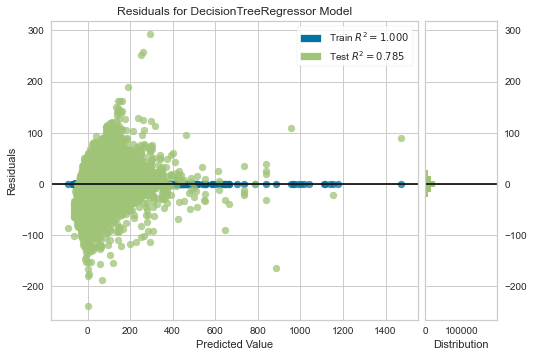

In [12]:
plot_model(dtmodel)

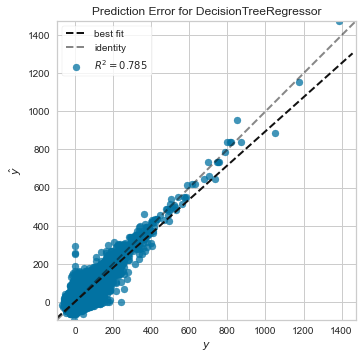

In [13]:
plot_model(dtmodel, plot = 'error')

In [14]:
evaluate_model(dtmodel)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [15]:
predict_model(dtmodel)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,12.7876,334.1135,18.2788,0.7854,1.0716,-0.2017


,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,CRSArrTime,Month_10,Month_4,Month_5,Month_6,Month_7,...,Carrier_HA,Carrier_MQ,Carrier_OO,Carrier_UA,Carrier_US,Carrier_VX,Carrier_WN,Carrier_YV,ArrDelay,Label
0,0.495837,-0.871831,0.043178,-0.318114,0.252504,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8,0.0
1,-1.561453,1.753393,1.260891,-0.290284,1.040007,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3,-21.0
2,0.303424,0.307289,0.579905,0.377636,0.880077,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,19,10.0
3,0.875337,0.908501,0.399581,-0.485094,0.497460,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-16,-8.0
4,-1.561453,0.333921,1.958848,1.156875,1.637214,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81577,-0.965571,-0.961713,0.475954,0.822916,0.695854,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,33,37.0
81578,-0.965571,1.350588,-1.541547,-0.485094,-1.555312,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-17,20.0
81579,0.495837,-0.748659,1.237555,-0.429434,1.499553,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4,-10.0
81580,1.292121,-0.961713,-0.894504,3.578084,-0.982398,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133,145.0


### Predict Test Data

In [16]:
#df.shape

In [17]:
#df1 = df[0:1000]

In [18]:
#df1

In [19]:
#df1.to_csv("testflightdata.csv", index=False)

In [20]:
testdata = pd.read_csv("testflightdata.csv")

In [21]:
testdata

,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,CRSArrTime,ArrDelay
0,4,19,5,DL,11433,13303,837,-3,1138,0
1,4,6,1,AA,11298,12339,1805,0,2105,0
2,4,19,3,AS,14893,13830,945,-4,1201,0
3,4,20,4,WN,13204,14683,1750,84,1935,0


In [22]:
prediction = predict_model(estimator=dtmodel, data=testdata, round=4)

In [23]:
prediction

,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,CRSArrTime,ArrDelay,Label
0,4,19,5,DL,11433,13303,837,-3,1138,0,28.0
1,4,6,1,AA,11298,12339,1805,0,2105,0,-6.0
2,4,19,3,AS,14893,13830,945,-4,1201,0,3.0
3,4,20,4,WN,13204,14683,1750,84,1935,0,63.0
